## 01 notebook:
This notebook focuses on initial data exploration and cleaning.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/fraud_insurance_claims.csv")
df.shape

(1000, 39)

In [3]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [4]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


## TARGET ANALYSIS (fraud_reported)

In [5]:
df['fraud_reported'].value_counts()


fraud_reported
N    753
Y    247
Name: count, dtype: int64

In [6]:
df['fraud_reported'].value_counts(normalize=True) * 100

fraud_reported
N    75.3
Y    24.7
Name: proportion, dtype: float64

In [7]:
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

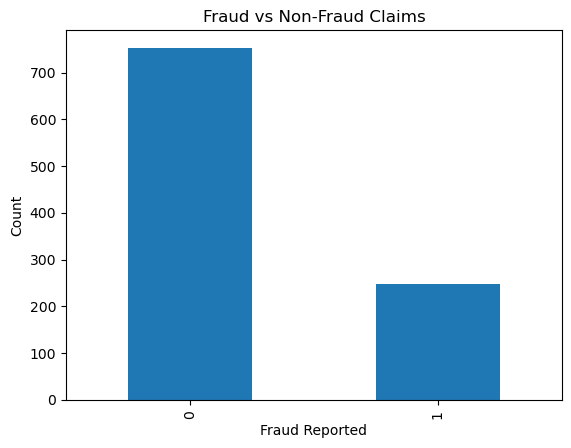

In [8]:
import matplotlib.pyplot as plt

df['fraud_reported'].value_counts().plot(kind='bar')
plt.title("Fraud vs Non-Fraud Claims")
plt.xlabel("Fraud Reported")
plt.ylabel("Count")
plt.show()

## Missing Values Analysis

In [9]:
df.isnull().sum().sort_values(ascending=False)

authorities_contacted          91
witnesses                       0
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
months_as_customer              0
incident_severity               0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim                   0
auto_make                       0
auto_model                      0
auto_year                       0
police_report_available         0
collision_type                  0
age                             0
insured_zip                     0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_sex   

In [10]:
df['authorities_contacted'] = df['authorities_contacted'].fillna('Unknown')

In [11]:
df['authorities_contacted'].isnull().sum()
df['authorities_contacted'].value_counts().head()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Unknown       91
Name: count, dtype: int64